# Chapter 14

In this chapter, we describe a simple machine learning algorithm (the perceptron), and then review some elementary probability.

The discussion of the perceptron follows the discussion in {cite}`Abu-Mostafa2012-ah` pp. 5 ff., and we largely just restrict ourselves to producing some nice animations of it (accessible via the click on the <i class="fa fa-rocket" aria-hidden="true"></i> icons at the top center-right).

## The perceptron algorithm

### The learning task

The displayed line through the origin classifies the points in the plane, with the light blue above and the light red below.

In particular, it classifies the displayed purple dots.

Task: *using only* the displayed purple dots and how they are classified by the displayed line, *compute* a second line through the origin which is approximately correct in the following ways:

1. classifies the purple dots the same (or approximately the same) as the displayed line, 

2. has high probability of succeeding on other dots

In this case, high probability means that the area between the two lines should be small.

In [1]:
n = 250 # number of data points


In [2]:
import math 
import numpy as np
import pandas as pd
from scipy.stats import binom, norm
from scipy.integrate import quad
import matplotlib
import matplotlib.pyplot as plt   
import metakernel
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets    
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
import seaborn as sns
sns.set_palette('pastel')
pastel_palette = sns.color_palette('pastel')
import random

In [3]:
def sign(x):
    return 1 if x > 0 else -1



In [4]:
# generate linearlly separate target data

m1 = random.choice([-.25, .25])*np.random.rand(1)
m2 = random.choice([-.25,.25])*np.random.rand(1)
b = 0



# generate training data 

def f(x1, x2):
    return m1*x1 + m2*x2+ b

data_x1 = np.random.uniform(-.5, .5, n)
data_x2 = np.random.uniform(-.5, .5, n)
data_0 = list(zip(data_x1, data_x2))
data_1 = [(x1, x2, sign(f(x1, x2))) for x1, x2 in data_0]


In [5]:
# define update function 

def update(w, data):
    misclassifed = [x for x in data if x[2] != sign(w[0]*x[0]+w[1]*x[1])]
    if len(misclassifed) == 0:
        return w, np.array([0, 0])
    else:
        x1, x2, y = random.choice(misclassifed)
        return w+y*np.array([x1, x2]), np.array([x1, x2])



# Define the number of iterations
l = 500

# Create a list to store all stages of w
w_stages = [[.25,-.25]]
w_points = [[0,0]]

# Run the update function over and over again
for _ in range(l):
    w, p = update(w_stages[-1], data_1)
    w_stages.append(list(w))  # Append the current stage of w to w_stages
    w_points.append(list(p))  # Append the current stage of w to w_stages 




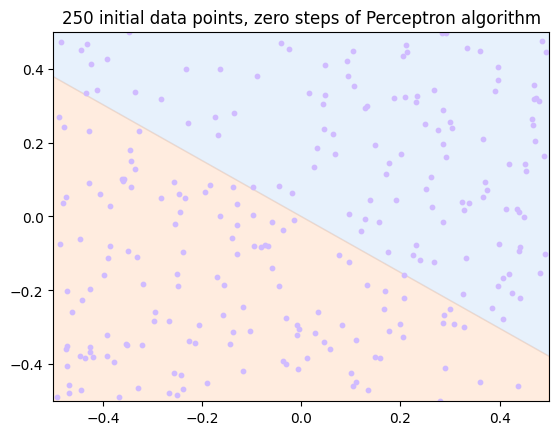

In [6]:
x = np.linspace(-.5, .5, 100)
y = np.linspace(-.5, .5, 100)
target = (1/m2)*(-m1*x - b)

# Create a plot
plt.xlim(-.5, .5)
plt.ylim(-.5,.5)
plt.fill_between(x, target, 1, alpha=0.25, color = pastel_palette[0])
plt.fill_between(x, target, -1, alpha=0.25, color = pastel_palette[1])

xdata_0, ydata_0 = zip(*data_0)


plt.scatter(xdata_0, ydata_0, color = pastel_palette[4], s=10)

plt.title("%i initial data points, zero steps of Perceptron algorithm" % n)

plt.show()


### Formatting the data

Since we know the purple points and the way that they are classified by the displayed line, we can view the data as organized as $(x_1, y_1, \pm 1), \ldots, (x_n, y_n, \pm 1)$, where $+1$ indicates that it was above the displayed line, and $-1$ indicates that it was below the displayed line.

### Formatting lines

Lines through the origin can be represented as pairs $(w_0, w_1)$ that determine the line 

$$\{(x,y): w_0\cdot x + w_1\cdot y=0\}$$

By setting $m=-\frac{w_0}{w_1}\cdot x$ one can put this in the more familiar format $y=mx$.

### The update procedure

We view ourselves as constructing lines represented by $(w_0(t), w_1(t))$ as a variable of the time $t=0, 1, 2, \ldots$. 

At $t=0$, we choose an arbitrary line (we choose $w_0(t)=\frac{1}{4}$ and $w_1(t)=-\frac{1}{4}$). 

At stage $t$, if we have correctly classified all the data, then we do nothing. 

But at stage $t+1$, if we have incorrectly classified a point as $\mp 1$ where we should have put $\pm 1$, we choose such a point $(x(t), y(t))$, and we shift to 

$$w_0(t+1) = w_0(t)\pm x(t)$$

$$w_1(t+1) = w_1(t)\pm y(t)$$

In the digrams below, the new line with represented by $(w_0(t+1), w_1(t+1))$ is drawn with a green line, and the point  $(x(t), y(t))$ incorrectly classified at stage $(w_0(t), w_1(t))$ is drawn with a big red dot.


In [7]:
def visual_perceptron(j, last_points = False):

    x = np.linspace(-.5, .5, 100)
    y = np.linspace(-.5, .5, 100)
    target = (1/m2)*(-m1*x - b)
    output = (1/w_stages[j][1])*(-w_stages[j][0]*x)

    # Create a plot
    plt.xlim(-.5, .5)
    plt.ylim(-.5,.5)
    plt.fill_between(x, target, 1, alpha=0.25, color = pastel_palette[0])
    plt.fill_between(x, target, -1, alpha=0.25, color = pastel_palette[1])

    xdata_0, ydata_0 = zip(*data_0)

    plt.plot(x, output, color = pastel_palette[2])

    plt.scatter(xdata_0, ydata_0, color = pastel_palette[4], s=10)

    if last_points:
        if w_points[j+1][0] != 0 and w_points[j+1][1] != 0:
            plt.scatter(w_points[j+1][0], w_points[j+1][1], color = pastel_palette[3], s=100)
    
    plt.title("Perceptron algorithm %i initial data points, %i steps of algorithm" % (n, j))

    plt.show()


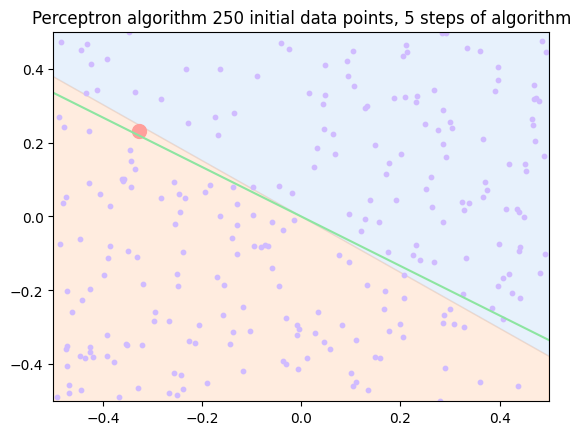

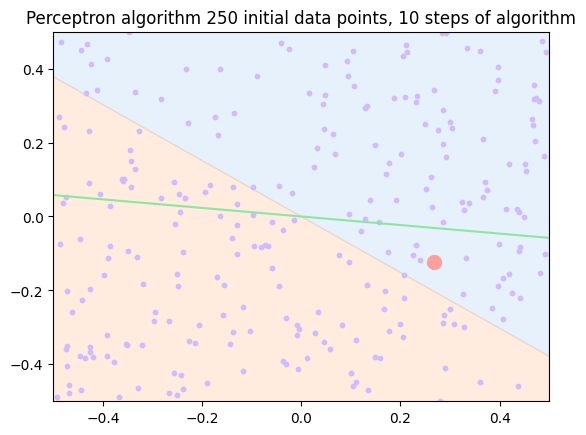

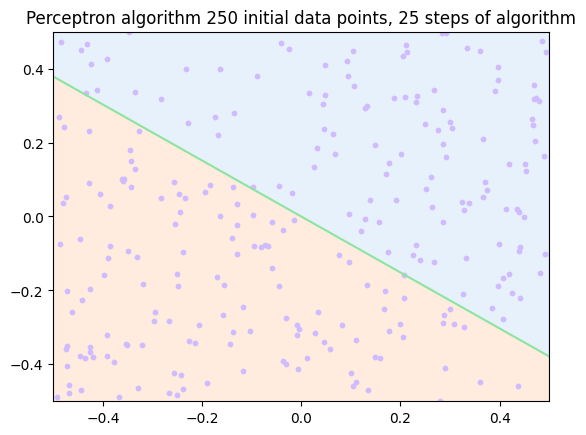

In [8]:
visual_perceptron(5, last_points=True)   
visual_perceptron(10, last_points=True)   
visual_perceptron(25, last_points=True)   

In [9]:
interact(visual_perceptron,
         j=IntSlider(min=0, max=l-1, step=1, value=3), 
         last_points=True)

interactive(children=(IntSlider(value=3, description='j', max=499), Checkbox(value=True, description='last_poi…

<function __main__.visual_perceptron(j, last_points=False)>

### Two facets of appoximate correctness revisited

One can use a geometric argument to show that at some point the algorithm teminates and that when it does so the computed line classifies all of the purple dots the same as the original line. 

However, nothing about this geometric argument guarantees that the second computed  lined is going to agree exactly with the original line. 

Nonetheless, observation suggests that the area between the two lines is small, and gets smaller the more one increases the number of original purple dots. Since the area is going proxy for probability of points in this case, this means that the observed phenomena is that the probability that the computed line and the original line agree is really high, as one increases the number of original purple dots

What explains this second aspect of correctness? 

It turns out that the relevant feature is: the hypotheses we are considering (namley lines) are comparatively simple in a certain sense. We get to that in the next chapter. 

For the remainder of this section, we review some rudiments of probability that we will need for next time.

## Review of probability

### Definition (probability axioms)

A *probability measure* $P$ is a function from subsets of the space $\Omega$ to real numbers  satisfying the following for all events $A,B\subseteq \Omega$:

- Non-negativity: $P(A)\geq 0$ 

- Finite additivity: $P(A\cup B)=P(A)+P(B)$ if $A\cap B=\emptyset$ 

- Value of entire space: $P(\Omega)=1$

Again, if $\Omega$ is infinite, one will in general need to restrict attention to Borel events (or some other reasonably defined class of events). And again, we ignore this issue here, not because it is unimportant but because it is a slightly different subject (measure theory and/or descriptive set theory).

For rest of this section, we fix $\Omega$ and only consider events (sets) which are subsets of $\Omega$

### Proposition (monotonicity)

For all events $A,B$ if $A\subseteq B$ then $P(A)\leq P(B)$

Proof: 

When $A\subseteq B$ we have $B=A\cup (B-A)$ and $A,B-A$ are disjoint. (Draw the picture)

We then appeal to finite monotoncity as follows:

$P(B) = P(A)+P(B-A)\geq P(A)$

For the last inequality, we appeal to non-negativity.

### Proposition (Subadditivty)

For all events $A,B$ one has $P(A\cup B)\leq P(A)+P(B)$.

Proof: 

We can decompose $A\cup B = (A\setminus B)\cup (A\cap B)\cup (B\setminus A)$ as a disjoint union.

By finite additivity one has $P(A\cup B)= P(A\setminus B)+P(A\cap B)+P(B\setminus A)$.

We can decompose $A=(A\setminus B)\cup (A\cap B)$ as a disjoint union. 

Hence $P(A)=P(A\setminus B)+P(A\cap B)$.

By monotonicity, $P(B\setminus A)\leq P(B)$. 

Hence putting this all together, we have 

$P(A\cup B)= P(A\setminus B)+P(A\cap B)+P(B\setminus A)=P(A)+P(B\setminus A)\leq P(A)+P(B)$.

### Talking about $\Omega$ and its subsets

Different disciplines have different ways of talking about $\Omega$ and its relevant subsets:

|  | Philosophy | Probability | Logic | Math |
|:----------:|:----------:|:----------:|:----------:|:----------:|
|   $\Omega$  |   Set of worlds  |   Sample space  | Set of models | Underlying set 
|   $\{A: A\subseteq \Omega\}$  |   Set of propositions  |   Event space  | Sets determined by formulas | Powerset of underlying set

In particular: elements of $\Omega$ are called:

- *worlds* in philosophy
- elements of the *sample space* in probability

And subsets of $\Omega$ are called:

- *propositions* in philosophy
- *events* in probability

### Some more notes on philosophy terminology and concepts 

One should beware philosophers following Davidson use "event" for more singular happenings: this specific touchdown in this specific game. Hence, if you are a philosopher, it is important for our purposes to get on board with the usage of "event" as "set of worlds."

A traditional statement of the propositions as "sets of worlds" is Stalnaker's Inquiry {cite}`Stalnaker1987-fw`. Of course, philosophers have other concepts of propositions, such as "Russellian propositions," on which propositions are more like interpreted sentences of first-order logic.

### Some more notes on logic and math terminology and concepts

If you are in certain parts of logic where a class of models (e.g. groups, rings, fields, partial orders, linear orders) is salient, then it's natural to consider the case where $\Omega$ is the class of models and where one restricts attention to subsets which satisfy some formula.

In pure mathematics, one often transitions more rapidly between different sets, and there it is useful to explicitly describe the *powerset operation* taking $\Omega$ to the set of all its subsets $\{A:A\subseteq \Omega\}$. The powerset is often written as $\mathcal{P}(\Omega)=\{A: A\subseteq \Omega\}$ or $\wp(\Omega)=\{A: A\subseteq \Omega\}$